<h1> Corpus statistics, ngrams, Frequency Plot</h1>

In [38]:
import os
import nltk
import matplotlib.pyplot as plt
from nltk import ngrams
import collections
from collections import defaultdict
import random 
import string
from nltk.corpus import stopwords
import numpy as np

#set(stopwords.words('english'))
%matplotlib inline
stop_words =['','(',')','{','}','\\','--',':','-']
punct=string.punctuation+"``"+"''"

<h4>The function will return text as string from news category of nltk brown corpus</h4>

In [5]:
def read_filename(repo, num_articles=100):
    files=[] #List
    if os.path.isfile(repo):
        files.append(repo)
    elif os.path.isdir(repo):
        files= [os.path.join(repo, f) for f in os.listdir(repo)[:num_articles] 
                if os.path.isfile(os.path.join(repo, f))]
    else:
        print('Provide correct file/directory information')
        return
    return files  

In [6]:
def extract_file_content(filenames):
    for file in filenames:
        with open(file,'r') as fp:
            yield fp.read().lower().replace('\n',' ')

<h4>Function return number of words in corpus </h4>

In [7]:
def num_of_words(corpus):
    num_words=0
    if isinstance(corpus, list): 
        for file_content in extract_file_content(corpus):
            words=[word for word in nltk.word_tokenize(file_content) if word not in punct and word not in stop_words]
            num_words+= len(words)
    elif type(corpus) is str:
        words=[word for word in nltk.word_tokenize(corpus) if word not in punct and word not in stop_words]
        num_words = len(words)
    else:
        print('corpus error')
    return num_words

<p>The function <code>create_tokens</code> takes as input a list of filenames or plain text and returns list of sentences.
    The output <code>sents</code> is a list of lists structure <code>[[], [], ....]</code>. </p>
<p>The Input Argument <code> corpus </code> may represent 1) list of filenames or 2) text. 
Each sentence itself is list of words. </p>
<p><code>nltk.sent_tokenize():</code> Return list of sentences from the given file</p>
<p><code>nltk.word_tokenize():</code> Return list of words from the given sentence/file </p>

In [34]:
def create_tokens(corpus):
    sents=[]
    if isinstance(corpus, list):
        for file_content in extract_file_content(corpus):
            for sent in nltk.sent_tokenize(file_content):
                token= [word for word in nltk.word_tokenize(sent) if word not in punct and word not in stopwords]
                sents.append(token)
    elif type(corpus) is str:
        for sent in nltk.sent_tokenize(corpus):
            token= [word for word in nltk.word_tokenize(sent) if word not in punct and word not in stopwords]
            sents.append(token)
    else:
        print('Corpus problem')      
    return sents

In [36]:
def train_test_split(sents, ratio=0.99):
    if len(sents) > 0:
        spl = int(ratio*len(sents))
        train_corpus = sents[:spl]
        test_corpus = sents[spl:]
    else:
        print('Corpus not created')
    train_corpus = [word for sent in train_corpus for word in sent]
    test_corpus = [word for sent in test_corpus for word in sent]
    return train_corpus, test_corpus

In [37]:
def cross_validation(sents, k=5):
    inx=0
    fold_size=int(len(sents)/k)
    for i in range(1, k+1):
        test_sents=sents[inx:inx+fold_size]
        train_sents=sents[0:inx]+sents[inx+fold_size:]
        inx=i*fold_size
        test_sents = [word for sent in test_sents for word in sent]
        train_sents = [word for sent in train_sents for word in sent]
        yield train_sents, test_sents

<h4>Function return number of unique words (vocabulary size) in corpus </h4>
<p><code>nltk.word_tokenizer(word_seq)</code> tokenizes a sentence into word list</p>

In [8]:
def num_of_unique_words(corpus):
    words=[]
    if isinstance(corpus, list):  
        for file_content in extract_file_content(corpus):
            words+=[word for word in nltk.word_tokenize(file_content) if word not in punct and word not in stop_words]
    elif type(corpus) is str:
        words=[word for word in nltk.word_tokenize(corpus) if word not in punct and word not in stop_words]
    else:
        print('corpus error')
    unique_words=set(words)
    return len(unique_words)

<h4>Function return number of sentences in the corpus </h4>
<code>nltk.sent_tokenizer(word_seq)</code> tokenizes a raw text into sentence list

In [9]:
def num_sentences(corpus):
    num_sents=0
    if isinstance(corpus, list):
        for file_content in extract_file_content(corpus):
            num_sents+=len(nltk.sent_tokenize(file_content))
    elif type(corpus) is str:
        num_sents = len(nltk.sent_tokenize(corpus))
    else:
        print('corpus error')  
    return num_sents

<h4>Function plot graph of rank vs. frequency of word in corpus </h4>
<p><code>freq_dist</code> iis a dictionary object that stores the (key, value) pairs and maintain 
    the order of the key, value pair.</p>

In [10]:
def zipf_plot(freq_dist):
    item=freq_dist.popitem()
    freq_dist=dict(reversed(sorted(freq_dist.items(), key=lambda item: item[1])))
    #plt.figure(figsize=(15,8))
    plt.rcParams['figure.figsize'] = (10,5)
    plt.rcParams['font.size'] = 10
    plt.plot(list(range(1,len(freq_dist)+1)),np.log(list((freq_dist.values())))) 
    plt.xlabel('Word Rank')
    plt.ylabel('log of Frequency')
    plt.title("{0}_grams distribution plot".format(len(item[0])))
    plt.show()
    return

<h4>Function return ngrams list of corpus</h4>
<p><code>nltk.ngrams</code>: This function is available in nltk which require two arguments. 
First argument is list, which contains all corpus words and second argument is ngrams order (i.e 1 for unigrams, 2 for bigrams, 3 for trigrams) and returns list generator.
</p>

In [11]:
def corpus_ngarms(corpus, ngram=1):
    ngram_lst=[]
    if isinstance(corpus, list):
        for file_content in extract_file_content(corpus):
            ngram_lst+=nltk.ngrams([word for word in nltk.word_tokenize(file_content) 
                                    if word not in punct and word not in stop_words], ngram)
    elif type(corpus) is str:
        ngram_lst+=nltk.ngrams([word for word in nltk.word_tokenize(corpus) 
                                    if word not in punct and word not in stop_words], ngram)
                
    else:
        print('corpus error')
    return ngram_lst

<h4>Function calculates ngrams frequency distribution in the corpus </h4>
<p><code>defaultdict</code>: The dictionary stores the data in key, value pairs and 
when key is not available it insert the key with default value.</p>

In [12]:
def freq_dist(corpus, ngram=1):
    freq_dist=defaultdict(int)
    if isinstance(corpus, list):
        for file_content in extract_file_content(corpus):
            for w in nltk.ngrams([word for word in nltk.word_tokenize(file_content) 
                                  if word not in punct and word not in stop_words],ngram):
                freq_dist[w]=freq_dist.get(w,0) + 1
    elif type(corpus) is str:
        for w in nltk.ngrams([word for word in nltk.word_tokenize(corpus) 
                                  if word not in punct and word not in stop_words],ngram):
            freq_dist[w]=freq_dist.get(w,0) + 1
    else:
        print('corpus error')
    return freq_dist

<h4>Function return top most commom ngrams in the corpus </h4>

In [13]:
def top_most_common_words(corpus, ngram=1, num_com_words=100):
        freq_dist={}
        temp=[]
        if isinstance(corpus, list):
            for file_content in extract_file_content(corpus):
                for w in nltk.ngrams([word for word in nltk.word_tokenize(file_content) 
                                  if word not in punct and word not in stop_words],ngram):
                    freq_dist[w]=freq_dist.get(w,0) + 1
        elif type(corpus) is str:
            for w in nltk.ngrams([word for word in nltk.word_tokenize(corpus) 
                                  if word not in punct and word not in stop_words],ngram):
                freq_dist[w]=freq_dist.get(w,0) + 1
        else:
            print('corpus error')
            return
        for i, item in enumerate(reversed(sorted(freq_dist.items(), key=lambda item: item[1]))):
            temp.append(item)
            if i >= num_com_words:
                break
        return temp

<h4>Function return average number of words in the sentences</h4>

In [14]:
def avg_sent_len(filenames):
    words=num_of_words(filenames)
    sents=num_sentences(filenames)
    return words/sents

<h3> Wikipedia Corpus Statistics</h3>

In [15]:
filenames=read_filename('../corpus.txt')

In [16]:
#corpus_content=list(extract_file_conten(filenames))[0]

In [17]:
len(filenames)

1

In [22]:
num_of_words(filenames)

672893

In [23]:
num_of_unique_words(filenames)

21369

In [24]:
num_sentences(filenames)

40992

In [25]:
avg_sent_len(filenames)

16.41522736143638

In [26]:
f_dist=freq_dist(filenames,1)

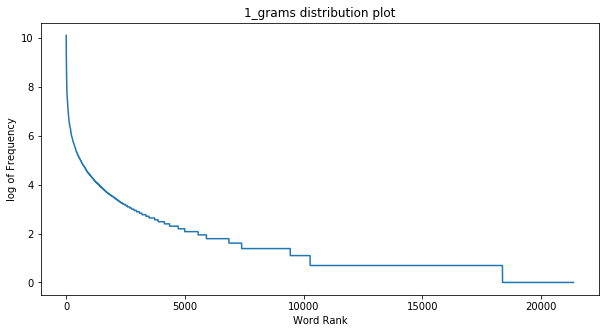

In [27]:
zipf_plot(f_dist)

In [28]:
#f_dist

In [29]:
ngram_lst=corpus_ngarms(filenames, ngram=2)

In [30]:
ngram_lst[:20]

[('long', 'overdue'),
 ('overdue', 'but'),
 ('but', 'good'),
 ('good', 'to'),
 ('to', 'see'),
 ('see', 'the'),
 ('the', 'senate'),
 ('senate', 'approve'),
 ('approve', 'much-needed'),
 ('much-needed', 'aid'),
 ('aid', 'for'),
 ('for', 'flint'),
 ('flint', 'time'),
 ('time', 'for'),
 ('for', 'the'),
 ('the', 'house'),
 ('house', 'to'),
 ('to', 'do'),
 ('do', 'the'),
 ('the', 'same')]

In [31]:
top_most_common_words(filenames, 2, 10)

[(('’', 's'), 2670),
 (('of', 'the'), 1918),
 (('in', 'the'), 1840),
 (('to', 'the'), 1445),
 (('on', 'the'), 1387),
 (('we', 'need'), 1244),
 (('it', "'s"), 1224),
 (('we', 'must'), 1119),
 (('for', 'the'), 1111),
 (('’', 't'), 1006),
 (('we', 'can'), 974)]